# STEP 1: LIBRARY

In [100]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


# STEP 2: LOAD DATA

In [84]:
df = pd.read_csv("student.csv")
df

,Statistic,Algebra,Geometry,Geography,Biology,Physics,Chemistry,Earth Sciences,Literature,Writing,Speech,Economics,Programming
0,14.23,6.84,9.72,15.6,2.8,2.29,127,5.64,14.00,3.06,1.04,3.92,1065
1,13.20,7.12,8.56,11.2,2.6,1.28,100,4.38,13.25,2.76,1.05,3.40,1050
2,13.16,9.44,10.68,18.6,3.0,2.81,101,5.68,14.00,3.24,1.03,3.17,1185
3,14.37,7.80,10.00,16.8,2.4,2.18,113,7.80,19.25,3.49,0.86,3.45,1480
4,13.24,10.36,11.48,21.0,3.9,1.82,118,4.32,14.00,2.69,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,22.60,9.80,20.5,5.2,1.06,95,7.70,8.40,0.61,0.64,1.74,740
174,13.40,15.64,9.92,23.0,4.3,1.41,102,7.30,9.00,0.75,0.70,1.56,750
175,13.27,17.12,9.04,20.0,4.3,1.35,120,10.20,7.95,0.69,0.59,1.56,835
176,13.17,10.36,9.48,20.0,5.3,1.46,120,9.30,8.25,0.68,0.60,1.62,840


In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Statistic       178 non-null    float64
 1   Algebra         178 non-null    float64
 2   Geometry        178 non-null    float64
 3   Geography       178 non-null    float64
 4   Biology         178 non-null    float64
 5   Physics         178 non-null    float64
 6   Chemistry       178 non-null    int64  
 7   Earth Sciences  178 non-null    float64
 8   Literature      178 non-null    float64
 9   Writing         178 non-null    float64
 10  Speech          178 non-null    float64
 11  Economics       178 non-null    float64
 12  Programming     178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [86]:
null_percentage = round(100*(df.isnull().sum())/len(df), 2)
null_percentage

Statistic         0.0
Algebra           0.0
Geometry          0.0
Geography         0.0
Biology           0.0
Physics           0.0
Chemistry         0.0
Earth Sciences    0.0
Literature        0.0
Writing           0.0
Speech            0.0
Economics         0.0
Programming       0.0
dtype: float64

# STEP 3: DATA EXPLORING

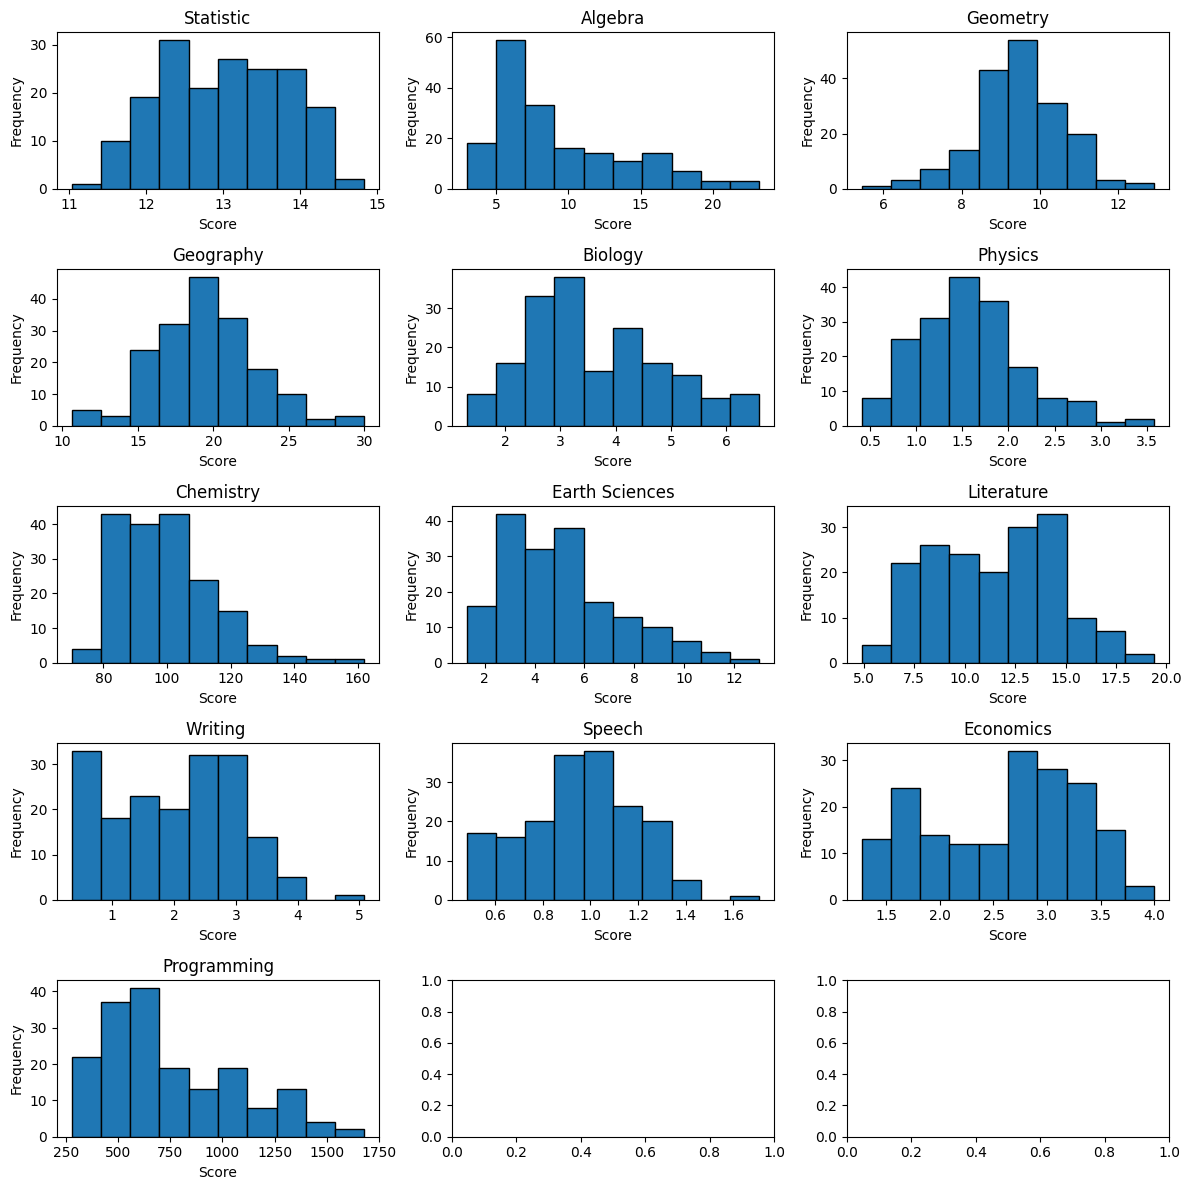

In [87]:
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(12, 12))  # Adjust the size as needed
axes = axes.flatten()  # Flatten the 2D axes array for easy iteration

# Loop through each column and plot the histogram
for i, column in enumerate(df.columns):
    ax = axes[i]  # Select the subplot for the current column
    df[column].plot(kind='hist', bins=10, edgecolor='black', ax=ax, title=column)
    ax.set_xlabel('Score')
    ax.set_ylabel('Frequency')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

In [88]:
print(max(df["Programming"]))
print(min(df["Programming"]))

1680
278


# STEP 4: DATA PREPROCESSING

In [89]:
def normalize(df):

    # Iterate over each column in the DataFrame
    for column in df.columns:
        # Get the maximum score in the current column
        max_score = df[column].max()
        
        # Normalize the column to a 4.0-point scale
        df[column] = (df[column] / max_score) * 4.0
    
    return df
# Normalize the scores to a 20-point scale
df = normalize(df)
df

,Statistic,Algebra,Geometry,Geography,Biology,Physics,Chemistry,Earth Sciences,Literature,Writing,Speech,Economics,Programming
0,3.838166,1.179310,3.009288,2.080000,1.696970,2.558659,3.135802,1.735385,2.886598,2.409449,2.432749,3.92,2.535714
1,3.560351,1.227586,2.650155,1.493333,1.575758,1.430168,2.469136,1.347692,2.731959,2.173228,2.456140,3.40,2.500000
2,3.549562,1.627586,3.306502,2.480000,1.818182,3.139665,2.493827,1.747692,2.886598,2.551181,2.409357,3.17,2.821429
3,3.875927,1.344828,3.095975,2.240000,1.454545,2.435754,2.790123,2.400000,3.969072,2.748031,2.011696,3.45,3.523810
4,3.571140,1.786207,3.554180,2.800000,2.363636,2.033520,2.913580,1.329231,2.886598,2.118110,2.432749,2.93,1.750000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3.697910,3.896552,3.034056,2.733333,3.151515,1.184358,2.345679,2.369231,1.731959,0.480315,1.497076,1.74,1.761905
174,3.614295,2.696552,3.071207,3.066667,2.606061,1.575419,2.518519,2.246154,1.855670,0.590551,1.637427,1.56,1.785714
175,3.579231,2.951724,2.798762,2.666667,2.606061,1.508380,2.962963,3.138462,1.639175,0.543307,1.380117,1.56,1.988095
176,3.552259,1.786207,2.934985,2.666667,3.212121,1.631285,2.962963,2.861538,1.701031,0.535433,1.403509,1.62,2.000000


In [90]:
df['Total'] = (
    df['Statistic'] + df['Algebra'] + df['Geometry'] + df['Geography'] +
    df['Biology'] + df['Physics'] + df['Chemistry'] + df['Earth Sciences'] +
    df['Literature'] + df['Writing '] + df['Speech'] + df['Economics'] +
    df['Programming']
)

# GPA Calculation
df['GPA'] = df['Total'] / len(df.columns)
df

,Statistic,Algebra,Geometry,Geography,Biology,Physics,Chemistry,Earth Sciences,Literature,Writing,Speech,Economics,Programming,Total,GPA
0,3.838166,1.179310,3.009288,2.080000,1.696970,2.558659,3.135802,1.735385,2.886598,2.409449,2.432749,3.92,2.535714,33.418090,2.387006
1,3.560351,1.227586,2.650155,1.493333,1.575758,1.430168,2.469136,1.347692,2.731959,2.173228,2.456140,3.40,2.500000,29.015506,2.072536
2,3.549562,1.627586,3.306502,2.480000,1.818182,3.139665,2.493827,1.747692,2.886598,2.551181,2.409357,3.17,2.821429,34.001580,2.428684
3,3.875927,1.344828,3.095975,2.240000,1.454545,2.435754,2.790123,2.400000,3.969072,2.748031,2.011696,3.45,3.523810,35.339762,2.524269
4,3.571140,1.786207,3.554180,2.800000,2.363636,2.033520,2.913580,1.329231,2.886598,2.118110,2.432749,2.93,1.750000,32.468950,2.319211
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3.697910,3.896552,3.034056,2.733333,3.151515,1.184358,2.345679,2.369231,1.731959,0.480315,1.497076,1.74,1.761905,29.623887,2.115992
174,3.614295,2.696552,3.071207,3.066667,2.606061,1.575419,2.518519,2.246154,1.855670,0.590551,1.637427,1.56,1.785714,28.824236,2.058874
175,3.579231,2.951724,2.798762,2.666667,2.606061,1.508380,2.962963,3.138462,1.639175,0.543307,1.380117,1.56,1.988095,29.322943,2.094496
176,3.552259,1.786207,2.934985,2.666667,3.212121,1.631285,2.962963,2.861538,1.701031,0.535433,1.403509,1.62,2.000000,28.867997,2.062000


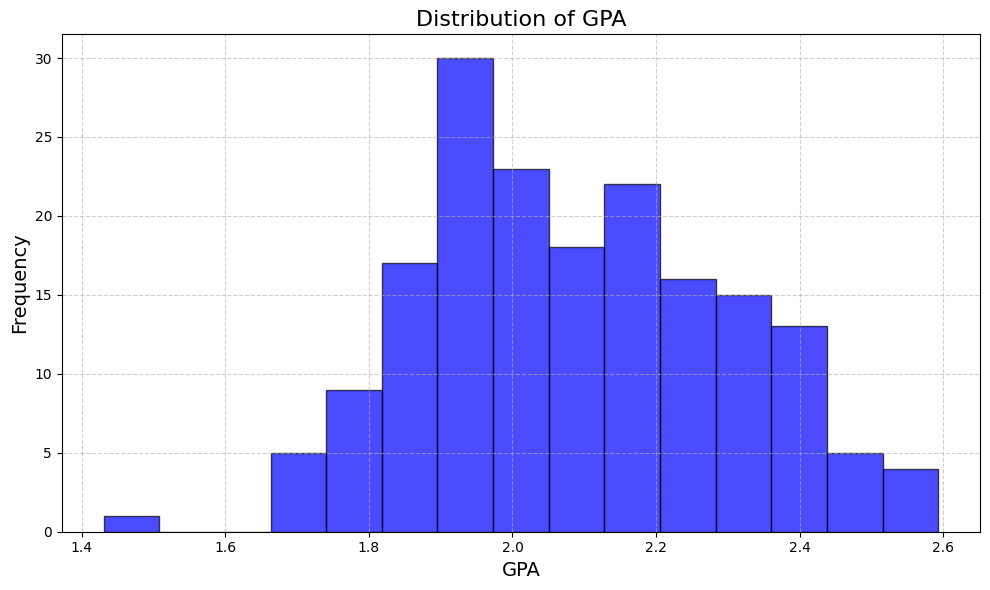

In [91]:
# Plot the histogram of GPA with enhancements
plt.figure(figsize=(10, 6))  # Set figure size for better visualization
plt.hist(df["GPA"], bins=15, color='blue', edgecolor='black', alpha=0.7)

# Add title and labels
plt.title('Distribution of GPA', fontsize=16)
plt.xlabel('GPA', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Add grid for better readability
plt.grid(True, linestyle='--', alpha=0.6)

# Show the plot
plt.tight_layout()
plt.show()

In [93]:
df_new = df.drop(columns=['GPA', 'Total'])
df_new

,Statistic,Algebra,Geometry,Geography,Biology,Physics,Chemistry,Earth Sciences,Literature,Writing,Speech,Economics,Programming
0,3.838166,1.179310,3.009288,2.080000,1.696970,2.558659,3.135802,1.735385,2.886598,2.409449,2.432749,3.92,2.535714
1,3.560351,1.227586,2.650155,1.493333,1.575758,1.430168,2.469136,1.347692,2.731959,2.173228,2.456140,3.40,2.500000
2,3.549562,1.627586,3.306502,2.480000,1.818182,3.139665,2.493827,1.747692,2.886598,2.551181,2.409357,3.17,2.821429
3,3.875927,1.344828,3.095975,2.240000,1.454545,2.435754,2.790123,2.400000,3.969072,2.748031,2.011696,3.45,3.523810
4,3.571140,1.786207,3.554180,2.800000,2.363636,2.033520,2.913580,1.329231,2.886598,2.118110,2.432749,2.93,1.750000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3.697910,3.896552,3.034056,2.733333,3.151515,1.184358,2.345679,2.369231,1.731959,0.480315,1.497076,1.74,1.761905
174,3.614295,2.696552,3.071207,3.066667,2.606061,1.575419,2.518519,2.246154,1.855670,0.590551,1.637427,1.56,1.785714
175,3.579231,2.951724,2.798762,2.666667,2.606061,1.508380,2.962963,3.138462,1.639175,0.543307,1.380117,1.56,1.988095
176,3.552259,1.786207,2.934985,2.666667,3.212121,1.631285,2.962963,2.861538,1.701031,0.535433,1.403509,1.62,2.000000


# STEP 5: Kmeans clustering before PCA

Elbow Method

[876.735478901623, 565.2701855312108, 437.398070682774, 397.67864272337556, 371.5180285040744, 353.40837019561405, 326.56077147717025, 311.827651677862, 296.63724491586817]


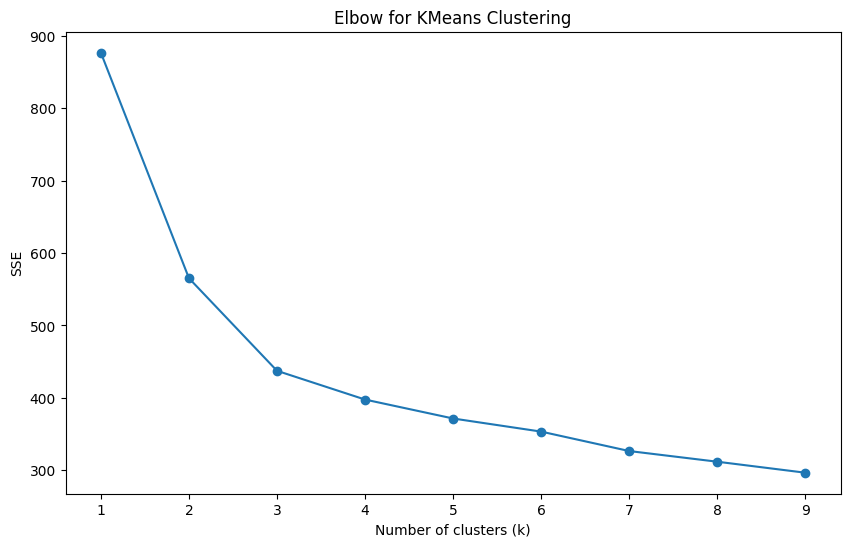

In [94]:
from sklearn.cluster import KMeans

sse = []
K_range = range(1,10)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_new)
    sse.append(kmeans.inertia_)  # inertia_ là tổng SSE

print(sse)
plt.figure(figsize=(10, 6))
plt.plot(K_range, sse, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('SSE')
plt.title('Elbow for KMeans Clustering')
plt.show()

Elbow Method to determine the number of clusters to be formed:


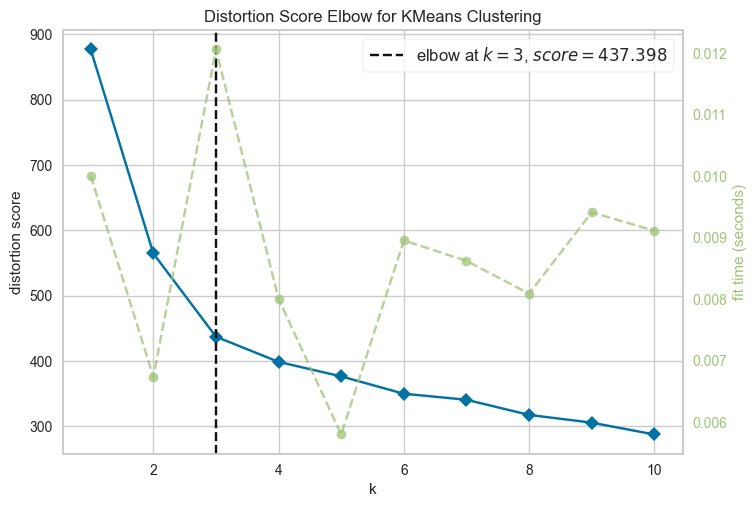

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [95]:
from yellowbrick.cluster import KElbowVisualizer
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=range(1, 11))
Elbow_M.fit(df_new)
Elbow_M.show()

Silhouette method

For n_clusters=2, the silhouette score is 0.3274087296993525
For n_clusters=3, the silhouette score is 0.2893665614815692
For n_clusters=4, the silhouette score is 0.24277234362460628
For n_clusters=5, the silhouette score is 0.2058880467945475
For n_clusters=6, the silhouette score is 0.14600244630934855
For n_clusters=7, the silhouette score is 0.15165314874002642
For n_clusters=8, the silhouette score is 0.17788794555146883
For n_clusters=9, the silhouette score is 0.1552719538355795


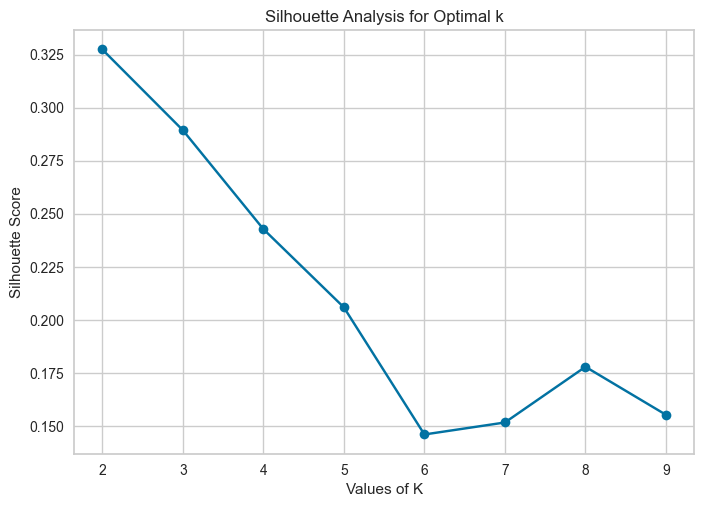

In [96]:
from sklearn.metrics import silhouette_score

silhouette_avg = []
K_range = range(2, 10)  # Start from 2 because silhouette score is not defined for k=1

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_new)
    cluster_labels = kmeans.labels_
    score = silhouette_score(df_new, cluster_labels)
    silhouette_avg.append(score)
    print("For n_clusters={}, the silhouette score is {}".format(k, score))

# Plot the silhouette scores for each k
plt.plot(K_range, silhouette_avg, marker='o')
plt.xlabel('Values of K')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis for Optimal k')
plt.show()

Final Kmean model decicion = 3

In [97]:
# Final model with k=3
kmeans_final = KMeans(n_clusters=3, max_iter=50)
kmeans_final.fit(df_new)

KMeans(max_iter=50, n_clusters=3)

In [98]:
df_new['Cluster_ID'] = kmeans_final.labels_
df_new.head()

,Statistic,Algebra,Geometry,Geography,Biology,Physics,Chemistry,Earth Sciences,Literature,Writing,Speech,Economics,Programming,Cluster_ID
0,3.838166,1.179310,3.009288,2.080000,1.696970,2.558659,3.135802,1.735385,2.886598,2.409449,2.432749,3.92,2.535714,1
1,3.560351,1.227586,2.650155,1.493333,1.575758,1.430168,2.469136,1.347692,2.731959,2.173228,2.456140,3.40,2.500000,1
2,3.549562,1.627586,3.306502,2.480000,1.818182,3.139665,2.493827,1.747692,2.886598,2.551181,2.409357,3.17,2.821429,1
3,3.875927,1.344828,3.095975,2.240000,1.454545,2.435754,2.790123,2.400000,3.969072,2.748031,2.011696,3.45,3.523810,1
4,3.571140,1.786207,3.554180,2.800000,2.363636,2.033520,2.913580,1.329231,2.886598,2.118110,2.432749,2.93,1.750000,1


In [99]:
cluster0_df = df_new[df_new["Cluster_ID"]==0]
cluster1_df = df_new[df_new["Cluster_ID"]==1]
cluster2_df = df_new[df_new["Cluster_ID"]==2]
print(f"Count cluster 0: {len(cluster0_df)}")
print(f"Count cluster 1: {len(cluster1_df)}")
print(f"Count cluster 2: {len(cluster2_df)}")

Count cluster 0: 50
Count cluster 1: 70
Count cluster 2: 58


# STEP 6: PCA =3

In [105]:
covar = df_new.cov(ddof=1)
print(covar)

                Statistic   Algebra  Geometry  Geography   Biology   Physics  \
Statistic        0.047947  0.015925  0.015738  -0.030248 -0.025753  0.019142   
Algebra          0.015925  0.593586  0.042940   0.098973  0.170254 -0.108763   
Geometry         0.015738  0.042940  0.115427   0.067073  0.047723  0.002097   
Geography       -0.030248  0.098973  0.067073   0.198270  0.121553 -0.056190   
Biology         -0.025753  0.170254  0.047723   0.121553  0.568912 -0.176468   
Physics          0.019142 -0.108763  0.002097  -0.056190 -0.176468  0.408969   
Chemistry        0.020911 -0.014828  0.034337  -0.013086 -0.068173  0.053323   
Earth Sciences   0.085339  0.136836  0.062740   0.005950  0.074817 -0.011518   
Literature       0.040844 -0.166611  0.028273  -0.092254 -0.218964  0.252691   
Writing          0.040784 -0.249053  0.030750  -0.123053 -0.319098  0.328287   
Speech          -0.008400 -0.231217 -0.013563  -0.065222 -0.105918  0.101054   
Economics        0.011247 -0.201688  0.0

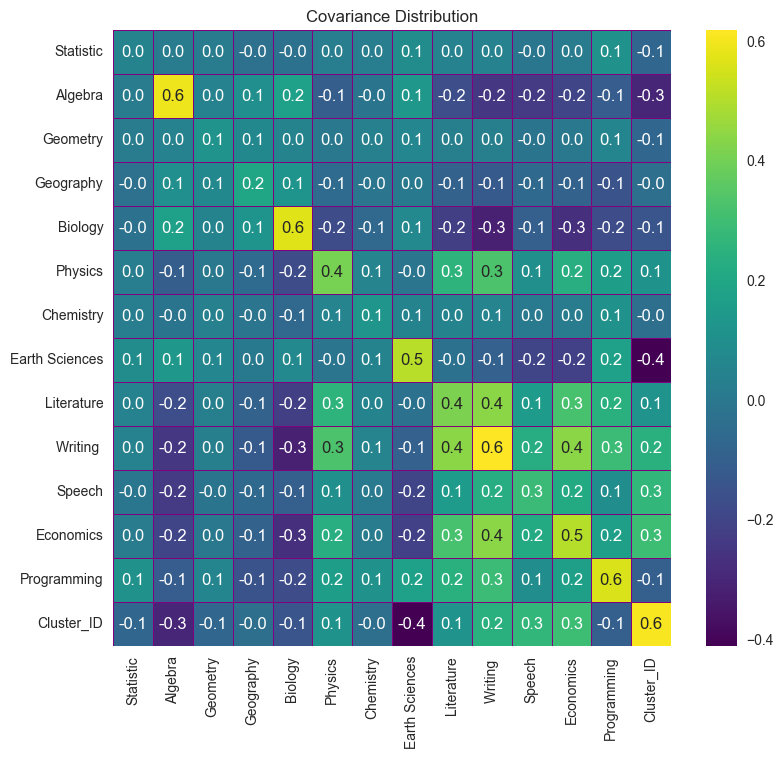

In [106]:
# plot the covariance matrix
f, ax = plt.subplots(figsize=(9,8))
sns.heatmap(covar, annot=True, linewidths=0.5, linecolor="purple",fmt='.1f', cmap='viridis', ax=ax)
plt.title("Covariance Distribution")
plt.show()

Eigenvalues and Eigenvectors

In [107]:
eigenvalues, eigenvectors = np.linalg.eig(covar)

print("Eigenvalues:\n", eigenvalues,"\n")
print("Eigenvectors:\n", eigenvectors,"\n")

Eigenvalues:
 [2.38716774 1.16689024 0.46951402 0.39116489 0.28134787 0.19703368
 0.17257825 0.01838051 0.03503114 0.11365236 0.10861856 0.08435262
 0.07811808 0.05759595] 

Eigenvectors:
 [[ 1.34970706e-02  1.48940033e-01 -3.23101791e-02 -3.30578555e-03
  -8.21972350e-02  9.90882450e-03  4.08394554e-02  9.75123408e-01
  -4.71133059e-02 -6.38261251e-02  3.34870719e-02 -5.82198195e-02
  -7.98632583e-02 -3.03613884e-03]
 [-3.04788716e-01  1.58754975e-01  7.77372044e-01  5.99106388e-02
  -3.78561907e-01  1.82628740e-01 -4.53764124e-02 -4.68509702e-02
   1.14427420e-02 -2.47016031e-01 -1.35733095e-01 -8.73758549e-02
  -5.97690153e-02  4.80573324e-02]
 [-1.53755945e-02  1.07308495e-01  7.59171677e-02 -2.29187238e-01
  -2.75114248e-02 -4.41550689e-01 -2.94533812e-01 -3.75966157e-02
  -7.54541566e-01 -5.03226102e-02 -6.55423344e-03  3.80135125e-02
   5.29306435e-03 -2.69609661e-01]
 [-1.22820115e-01 -8.75243741e-02  1.92741802e-01 -1.82498853e-01
   2.24704587e-01 -5.34819964e-01 -4.19792227e

In [108]:
tot = sum(eigenvalues)
variance_explained =[( i /tot ) * 100 for i in sorted(eigenvalues, reverse=True)]
cumulaive_var_explained = np.cumsum(variance_explained)
print("Variance Explainedn:\n", variance_explained)
print("\n")
print("Cumulative Variance Explainedn:\n", cumulaive_var_explained)


Variance Explainedn:
 [42.92350906678355, 20.98177797412046, 8.442301305597098, 7.033510619517681, 5.0588979224624016, 3.542849860316343, 3.103118394461238, 2.0435757988451533, 1.9530634029754184, 1.5167390510986942, 1.4046361802858538, 1.0356290150632155, 0.6298926317411435, 0.3304987767317475]


Cumulative Variance Explainedn:
 [ 42.92350907  63.90528704  72.34758835  79.38109897  84.43999689
  87.98284675  91.08596514  93.12954094  95.08260435  96.5993434
  98.00397958  99.03960859  99.66950122 100.        ]


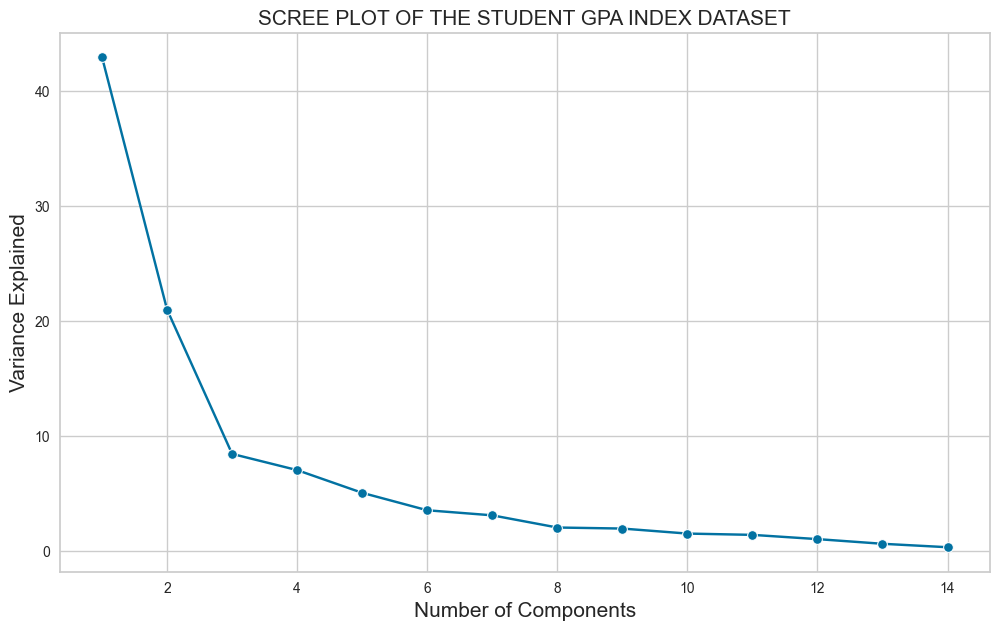

In [112]:
plt.figure(figsize=(12,7))
sns.lineplot(y=variance_explained,x=range(1,len(variance_explained)+1),marker='o')
plt.xlabel('Number of Components',fontsize=15)
plt.ylabel('Variance Explained',fontsize=15)
plt.title('SCREE PLOT OF THE STUDENT GPA INDEX DATASET',fontsize=15)
plt.grid(True)
plt.show()

In [124]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3, random_state=2)
df_pca = pca.fit_transform(df_new)
df_pca.transpose()

# Convert the result to a DataFrame with custom column names
df_pca = pd.DataFrame(df_pca, columns=['PCA1', 'PCA2', 'PCA3'])

# Check the first few rows of the new DataFrame
print(df_pca.head())

       PCA1      PCA2      PCA3
0 -1.821136  0.982054  0.075028
1 -1.294322  0.424899 -0.414081
2 -1.536516  1.200191  0.441654
3 -2.095918  2.172271  0.001028
4 -0.556386  0.216362  0.541803


# STEP 7: Kmeans clustering after PCA = 3

[712.1722444173449, 344.5386082323974, 169.97530661075848, 137.01244795082232, 121.14226894823082, 114.78842615753405, 99.4588845217624, 89.37112826908383, 77.11051985879588]


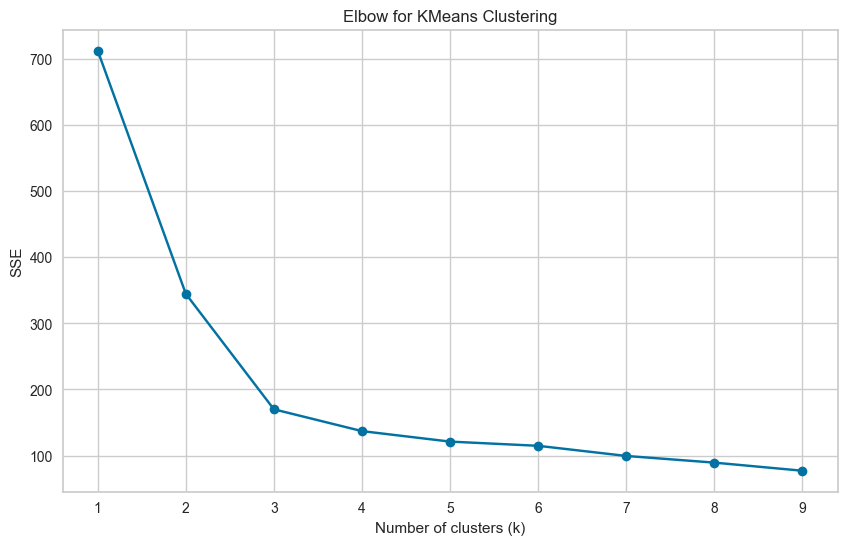

In [125]:
from sklearn.cluster import KMeans

sse = []
K_range = range(1,10)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_pca)
    sse.append(kmeans.inertia_)  # inertia_ là tổng SSE

print(sse)
plt.figure(figsize=(10, 6))
plt.plot(K_range, sse, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('SSE')
plt.title('Elbow for KMeans Clustering')
plt.show()

Elbow Method to determine the number of clusters to be formed:


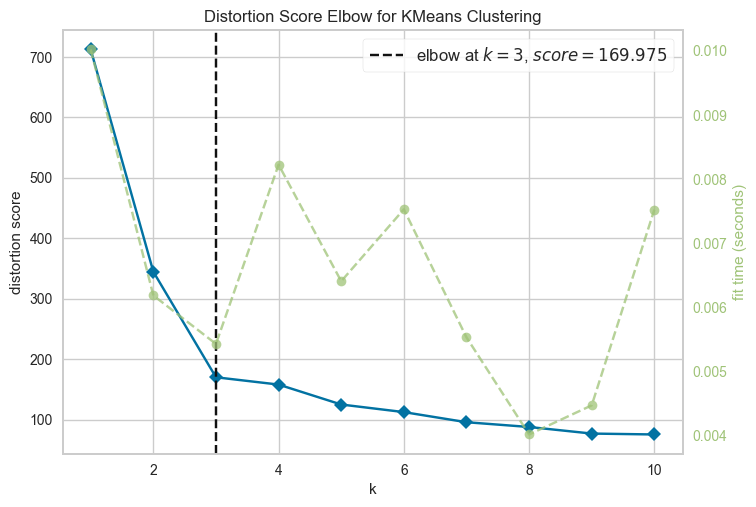

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [126]:
from yellowbrick.cluster import KElbowVisualizer
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=range(1, 11))
Elbow_M.fit(df_pca)
Elbow_M.show()

For n_clusters=2, the silhouette score is 0.5115116000805067
For n_clusters=3, the silhouette score is 0.5436569505584977
For n_clusters=4, the silhouette score is 0.4343183312477911
For n_clusters=5, the silhouette score is 0.32307426294177827
For n_clusters=6, the silhouette score is 0.2671621382626648
For n_clusters=7, the silhouette score is 0.19162417709328747
For n_clusters=8, the silhouette score is 0.18748079566807863
For n_clusters=9, the silhouette score is 0.18586556266045892


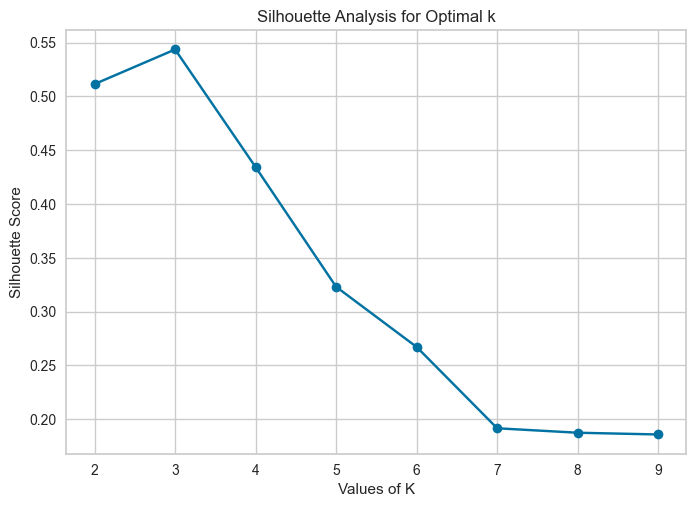

In [127]:
from sklearn.metrics import silhouette_score

silhouette_avg = []
K_range = range(2, 10)  # Start from 2 because silhouette score is not defined for k=1

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_new)
    cluster_labels = kmeans.labels_
    score = silhouette_score(df_pca, cluster_labels)
    silhouette_avg.append(score)
    print("For n_clusters={}, the silhouette score is {}".format(k, score))

# Plot the silhouette scores for each k
plt.plot(K_range, silhouette_avg, marker='o')
plt.xlabel('Values of K')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis for Optimal k')
plt.show()

In [128]:
# Final model with k=3
kmeans_final_pca = KMeans(n_clusters=3, max_iter=50)
kmeans_final_pca.fit(df_pca)

KMeans(max_iter=50, n_clusters=3)

In [129]:
df_pca['Cluster_ID'] = kmeans_final.labels_
df_pca.head()

,PCA1,PCA2,PCA3,Cluster_ID
0,-1.821136,0.982054,0.075028,1
1,-1.294322,0.424899,-0.414081,1
2,-1.536516,1.200191,0.441654,1
3,-2.095918,2.172271,0.001028,1
4,-0.556386,0.216362,0.541803,1


In [130]:
cluster0_df = df_pca[df_pca["Cluster_ID"]==0]
cluster1_df = df_pca[df_pca["Cluster_ID"]==1]
cluster2_df = df_pca[df_pca["Cluster_ID"]==2]
print(f"Count cluster 0: {len(cluster0_df)}")
print(f"Count cluster 1: {len(cluster1_df)}")
print(f"Count cluster 2: {len(cluster2_df)}")

Count cluster 0: 50
Count cluster 1: 70
Count cluster 2: 58


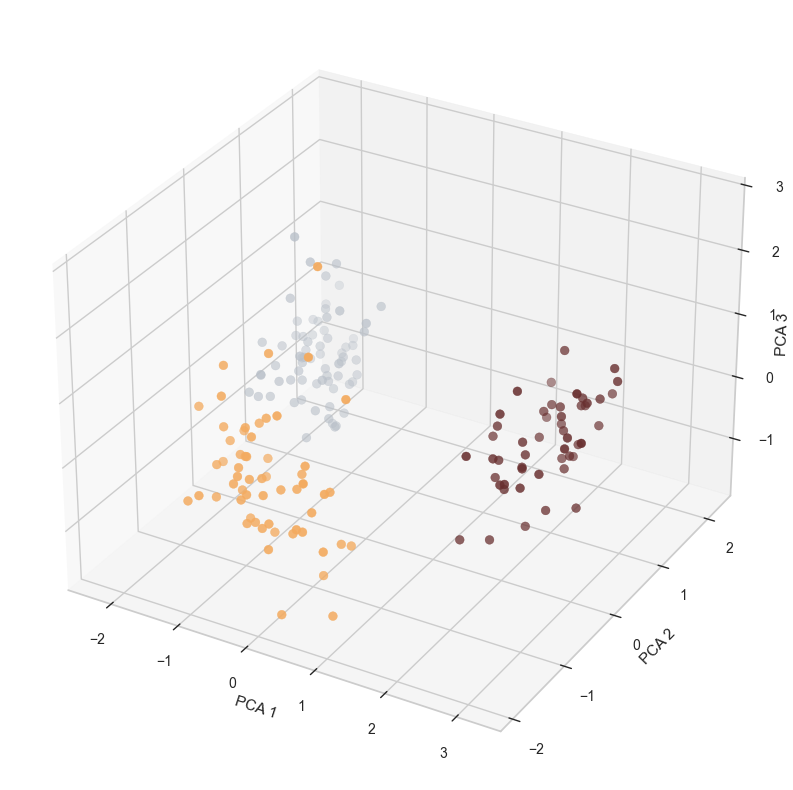

In [135]:
#Plotting the clusters

x =df_pca['PCA1']
y =df_pca['PCA2']
z =df_pca['PCA3']

from matplotlib import colors
cmap = colors.ListedColormap(["#682F2F","#B9C0C9", "#F3AB60"])
fig = plt.figure(figsize=(12,10))
ax = plt.subplot(111, projection='3d', label="Cluster ID")
ax.scatter(x, y, z, s=40, c=df_pca['Cluster_ID'], marker='o', cmap = cmap)
ax.set_xlabel("PCA 1")
ax.set_ylabel("PCA 2")
ax.set_zlabel("PCA 3",labelpad=-1)

plt.show()